- 결측치X  
- 대출기간 36, 60 months  
- train.csv로 학습시킨 후 test.csv로 성능 확인 -> 제출 = test.csv

In [1]:
import pandas as pd

In [2]:
test = pd.read_csv("C:/Users/user/Downloads/대출등급예측모델/test.csv")
train = pd.read_csv("C:/Users/user/Downloads/대출등급예측모델/train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64197 entries, 0 to 64196
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            64197 non-null  object 
 1   대출금액          64197 non-null  int64  
 2   대출기간          64197 non-null  object 
 3   근로기간          64197 non-null  object 
 4   주택소유상태        64197 non-null  object 
 5   연간소득          64197 non-null  int64  
 6   부채_대비_소득_비율   64197 non-null  float64
 7   총계좌수          64197 non-null  int64  
 8   대출목적          64197 non-null  object 
 9   최근_2년간_연체_횟수  64197 non-null  int64  
 10  총상환원금         64197 non-null  int64  
 11  총상환이자         64197 non-null  float64
 12  총연체금액         64197 non-null  float64
 13  연체계좌수         64197 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 6.9+ MB


In [5]:
train[train['주택소유상태'] == 'ANY']  #이상치? 삭제?

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,TRAIN_28730,41160000,36 months,10+ years,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


In [6]:
#대출기간, 근로기간, 주택소유상태 숫자로 라벨링

In [7]:
train['대출기간'] = train['대출기간'].str.replace(' months', '').astype(int)
test['대출기간'] = test['대출기간'].str.replace(' months', '').astype(int)

In [8]:
train['근로기간'] = train['근로기간'].str.replace('years', '').str.replace('+', '').str.replace('<', '').str.strip()
train['근로기간'] = train['근로기간'].replace({'1 year': '1 year', '10 years': '10 years'})
train = train[train['근로기간'] != 'Unknown']
train['근로기간'] = train['근로기간'].replace({'1': '< 1', '10': '10+'})
train['근로기간'] = train['근로기간'].replace({'1 year': '1'})
train['근로기간'] = train['근로기간'].str.replace('+', '').str.replace('< 1', '0.5').astype(float)

In [9]:
test['근로기간'] = test['근로기간'].str.replace('years', '').str.replace('+', '').str.replace('<', '').str.strip()
test['근로기간'] = test['근로기간'].replace({'1 year': '1 year', '10 years': '10 years'})
test = test[test['근로기간'] != 'Unknown']
test['근로기간'] = test['근로기간'].replace({'1': '< 1', '10': '10+'})
test['근로기간'] = test['근로기간'].replace({'1 year': '1'})
test['근로기간'] = test['근로기간'].str.replace('+', '').str.replace('< 1', '0.5').astype(float)

In [10]:
train['근로기간'].unique()

array([ 6. , 10. ,  5. ,  8. ,  9. ,  2. ,  1. ,  3. ,  7. ,  4. ,  0.5])

In [11]:
def change_value(values):
    if values == 'RENT':
        return 1
    elif values == 'MORTGAGE':
        return 2
    elif values == 'OWN':
        return 3
    elif values == 'ANY':
        return 4

In [12]:
train['주택소유상태'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

In [13]:
test['주택소유상태'].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [14]:
train['주택소유상태'] = train['주택소유상태'].apply(change_value)
train['주택소유상태'] = train['주택소유상태'].astype(int)

In [15]:
test['주택소유상태'] = test['주택소유상태'].apply(change_value)
test['주택소유상태'] = test['주택소유상태'].astype(int)

In [16]:
train['주택소유상태'].unique()

array([1, 2, 3, 4])

In [17]:
test['주택소유상태'].unique()

array([2, 1, 3])

In [18]:
test.loc[test['대출목적'].str.contains('결혼'), '대출목적'] = '기타'

In [19]:
category_mapping = {
    '부채 통합': 1,
    '주택 개선': 2,
    '휴가': 3,
    '의료': 4,
    '자동차': 5,
    '기타': 6,
    '신용 카드': 7,
    '주요 구매': 8,
    '이사': 9,
    '소규모 사업': 10,
    '주택': 11,
    '재생 에너지': 12
}

train['대출목적'] = train['대출목적'].map(category_mapping)
test['대출목적'] = test['대출목적'].map(category_mapping)
train['대출목적'] = train['대출목적'].astype(int)
test['대출목적'] = test['대출목적'].astype(int)

In [20]:
train['대출목적'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [21]:
test['대출목적'].unique()

array([ 2,  1,  7,  6,  8,  9,  3, 10, 11,  4,  5, 12])

In [22]:
test.drop('총연체금액', axis=1, inplace=True)
test.drop('연체계좌수', axis=1, inplace=True)
train.drop('총연체금액', axis=1, inplace=True)
train.drop('연체계좌수', axis=1, inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90623 entries, 0 to 96293
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            90623 non-null  object 
 1   대출금액          90623 non-null  int64  
 2   대출기간          90623 non-null  int32  
 3   근로기간          90623 non-null  float64
 4   주택소유상태        90623 non-null  int32  
 5   연간소득          90623 non-null  int64  
 6   부채_대비_소득_비율   90623 non-null  float64
 7   총계좌수          90623 non-null  int64  
 8   대출목적          90623 non-null  int32  
 9   최근_2년간_연체_횟수  90623 non-null  int64  
 10  총상환원금         90623 non-null  int64  
 11  총상환이자         90623 non-null  float64
 12  대출등급          90623 non-null  object 
dtypes: float64(3), int32(3), int64(5), object(2)
memory usage: 8.6+ MB


In [24]:
X = train[['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적', '최근_2년간_연체_횟수', '총상환원금','총상환이자' ]]
y = train['대출등급']

In [25]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [27]:
# 정규화
mm = StandardScaler() 

mm_X_train = mm.fit_transform(X_train)
mm_X_test = mm.transform(X_test)

In [28]:
# SMOTE 적용 (데이터 불균형 해소)
X_train_over, y_train_over = SMOTE(random_state=0).fit_resample(mm_X_train, y_train)

In [29]:
lgbm_model = LGBMClassifier(ramdom_state=0, verbose=-1)
lgbm_model.fit(X_train_over, y_train_over)

LGBMClassifier(ramdom_state=0, verbose=-1)

In [30]:
y_pred_lgbm = lgbm_model.predict(mm_X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_lgbm)

0.8358834780050022

In [32]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_lgbm)
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {fscore}")

Precision: [0.84354272 0.86163203 0.85355967 0.8231454  0.74952919 0.65217391
 0.56521739], Recall: [0.90460251 0.83599705 0.86852282 0.73619958 0.76318313 0.76923077
 0.67241379], F1-Score: [0.87300626 0.84862099 0.86097623 0.77724853 0.75629454 0.70588235
 0.61417323]


In [33]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [37]:
# F1 score == 0.92

model = LGBMClassifier(verbose=-1)
param  = {
    'num_leaves' : [30,35,40,45],
    'learning_rate' : [0.05, 0.1], 
    'max_depth' : [9,11,13], 
    'min_child_samples' : [5,10,15],
    'feature_fraction' : [0.5,0.8,1.0], 
    'bagging_fraction' : [0.5, 0.8,1.0], 
    'scale_pos_weight' : [1]
}

random_search = RandomizedSearchCV(
    model,             
    param_distributions=param,  
    n_iter=10,          
    scoring='accuracy', 
    cv=3,               
    random_state=42,    
    n_jobs=-1           
)

random_search.fit(X_train_over, y_train_over)


print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
y_pred = random_search.predict(mm_X_test)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred)
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {fscore}")

Best Parameters: {'scale_pos_weight': 1, 'num_leaves': 45, 'min_child_samples': 15, 'max_depth': 11, 'learning_rate': 0.1, 'feature_fraction': 0.8, 'bagging_fraction': 0.5}
Best Accuracy: 0.8875795749937616
Precision: [0.85567823 0.86695064 0.87335569 0.83400345 0.77140169 0.66666667
 0.6440678 ], Recall: [0.90794979 0.85074994 0.87290539 0.77070064 0.78619367 0.7985348
 0.65517241], F1-Score: [0.88103938 0.85877389 0.87313048 0.80110345 0.77872745 0.72666667
 0.64957265]


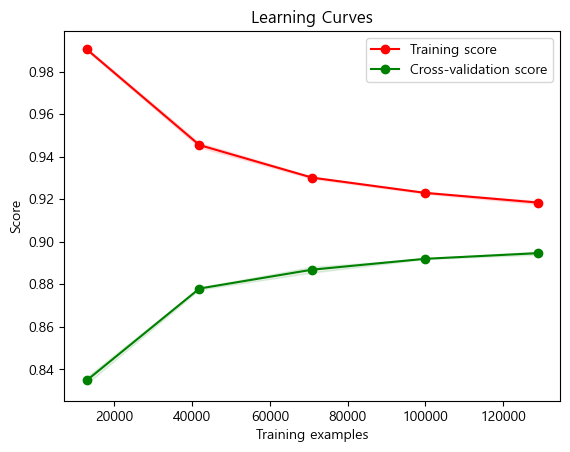

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


# 학습 곡선을 그리는 함수
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 학습 곡선을 그리기 위한 데이터 설정
title = "Learning Curves"
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

# plot_learning_curve 함수 호출
plot_learning_curve(random_search.best_estimator_, title, X_train_over, y_train_over, cv=cv, n_jobs=-1)
plt.show()

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 (여기에 적절한 하이퍼파라미터 설정 필요)
model = RandomForestClassifier(n_estimators=100, max_depth=11)

# K-Fold Cross-Validation 수행 (cv는 폴드 수)
cv_scores = cross_val_score(model, X_train_over, y_train_over, cv=5, scoring='accuracy')

# 교차 검증 성능 출력
print("Cross-Validation Accuracy Scores:", cv_scores)

# 평균 정확도 계산
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Accuracy Scores: [0.79172358 0.79311415 0.80292447 0.79854708 0.80047189]
Mean Accuracy: 0.7973562340592886


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

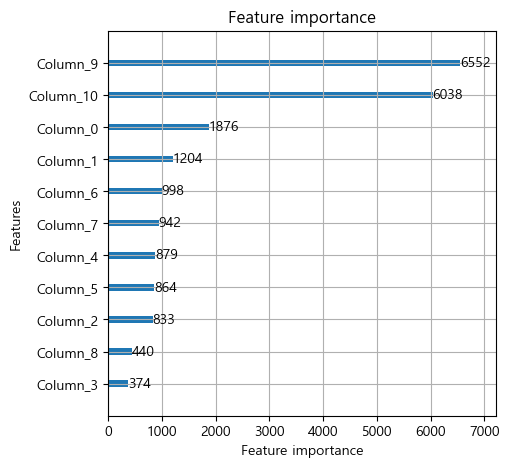

In [38]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.family'] ='Malgun Gothic'

fig, ax = plt.subplots(figsize=(5,5))
plot_importance(lgbm_model, ax=ax)

In [39]:
id_column = test['ID']

test.drop('ID', axis=1, inplace=True)

test['대출등급'] = lgbm_model.predict(test)

test.insert(0, 'ID', id_column)


In [40]:
test

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,대출등급
0,TEST_00000,16800000,36,8.0,2,132000000,19.64,12,2,0,394692,146604.0,D
1,TEST_00001,8400000,36,5.0,1,89971200,15.84,25,1,0,0,0.0,B
2,TEST_00002,17280000,36,6.0,1,150000000,8.41,20,7,0,1786980,281820.0,D
3,TEST_00003,14400000,36,5.0,2,66000000,13.72,30,7,1,669024,281724.0,D
4,TEST_00004,27600000,36,5.0,1,55200000,30.50,12,7,0,1250052,614844.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36,3.0,2,78000000,22.08,27,1,2,1307532,763380.0,D
64193,TEST_64193,30000000,60,10.0,2,109200000,12.06,26,1,0,960612,1245252.0,D
64194,TEST_64194,6120000,36,10.0,1,39600000,28.80,33,1,0,131520,80880.0,D
64195,TEST_64195,11520000,36,10.0,2,66000000,25.44,41,1,1,1339536,601872.0,D


In [41]:
test_data = test[['ID', '대출등급']]

In [42]:
test_data

,ID,대출등급
0,TEST_00000,D
1,TEST_00001,B
2,TEST_00002,D
3,TEST_00003,D
4,TEST_00004,D
...,...,...
64192,TEST_64192,D
64193,TEST_64193,D
64194,TEST_64194,D
64195,TEST_64195,D


In [43]:
test_data['대출등급'].unique()

array(['D', 'B', 'F', 'G'], dtype=object)

In [44]:
train['대출등급'].unique()

array(['C', 'B', 'A', 'D', 'F', 'G', 'E'], dtype=object)